## Un análisis estadístico del terrorismo mundial, enfocado en las dinámicas de Sur América y Colombia

In [96]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pp

Aquí usaremos el dataset llamado 'globalterrorismdb_0718dist.csv'. Se puede acceder desde Kaggle a esta, en los enlaces del reporte.

In [73]:
import io
dataset_gtd = pd.read_csv('globalterrorismdb_0718dist.csv')
dataset_gtd.sample(10)

/home/ubunsam/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
26106,198508280007,1985,8,28,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
141397,201412090022,2014,12,9,NaN,0,NaN,60,Egypt,10,...,NaN,"""Bomb goes off in Cairo's Abbasiya | 2014-12-0...","""Egyptian police defuse bomb eastern Cairo...",NaN,START Primary Collection,-9,-9,0,-9,NaN
95863,201003270005,2010,3,27,NaN,0,NaN,182,Somalia,11,...,NaN,"Jane�s Intelligence, �IED Attack Kills Four in...","National Counterterrorism Center, ""One Governm...","Alshahid Network, ""District Commissioner for H...",ISVG,0,0,0,0,NaN
6156,197803270004,1978,3,27,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
114779,201302260025,2013,2,26,NaN,0,NaN,141,Nepal,6,...,NaN,"""Four devices planted by new outfit defused,"" ...",NaN,NaN,START Primary Collection,0,0,0,0,"201302260022, 201302260023, 201302260024, 2013..."
122137,201310110012,2013,10,11,NaN,0,NaN,92,India,6,...,NaN,"""Shillong violence victim dies in Delhi hospit...","""Miscreants hurl petrol bomb,"" The Sentinel, O...",NaN,START Primary Collection,-9,-9,0,-9,NaN
161033,201604100055,2016,4,10,NaN,0,NaN,92,India,6,...,NaN,"""Odisha: Maoist 'Comeback',"" IBNS, May 2, 2016.",NaN,NaN,START Primary Collection,0,0,0,0,NaN
156872,201512230011,2015,12,23,2015-12-23 00:00:00,0,NaN,95,Iraq,10,...,NaN,"""Revision: Iraq: Roundup of Security Incidents...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
43717,199008160009,1990,8,16,NaN,0,NaN,156,Panama,2,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
71360,200011130001,2000,11,13,NaN,0,NaN,160,Philippines,5,...,NaN,"""Across the nation Soldier Wounded in Zambo At...",NaN,NaN,CETIS,0,0,0,0,NaN


Procederemos a visualizar la densidad de los casos terroristas en Colombia a través de los años, considerando también Sur América y el mundo.

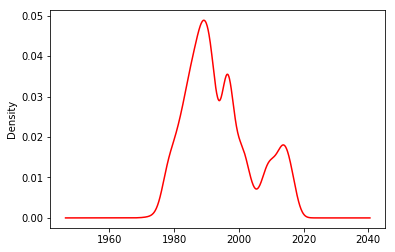

In [75]:
dataset_gtd.loc[dataset_gtd['country_txt']=='Colombia']['iyear'].plot.kde(color='red') 

In [ ]:
dataset_gtd.loc[dataset_gtd['region_txt']=='South America']['iyear'].plot.kde(color='blue') 
dataset_gtd.loc[dataset_gtd['country_txt']!='Colombia']['iyear'].plot.kde(color='green')

Vemos también los casos en los cuales el atentado duró más de un día.

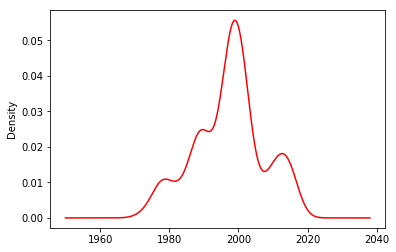

In [46]:
dataset_gtd.loc[(dataset_gtd['country_txt']=='Colombia') & (dataset_gtd['extended']==1)]['iyear'].plot.kde(color='red')

Ahora consideraremos el desarrollo de un pair plot para ver la dinámica de las muertes en los años.

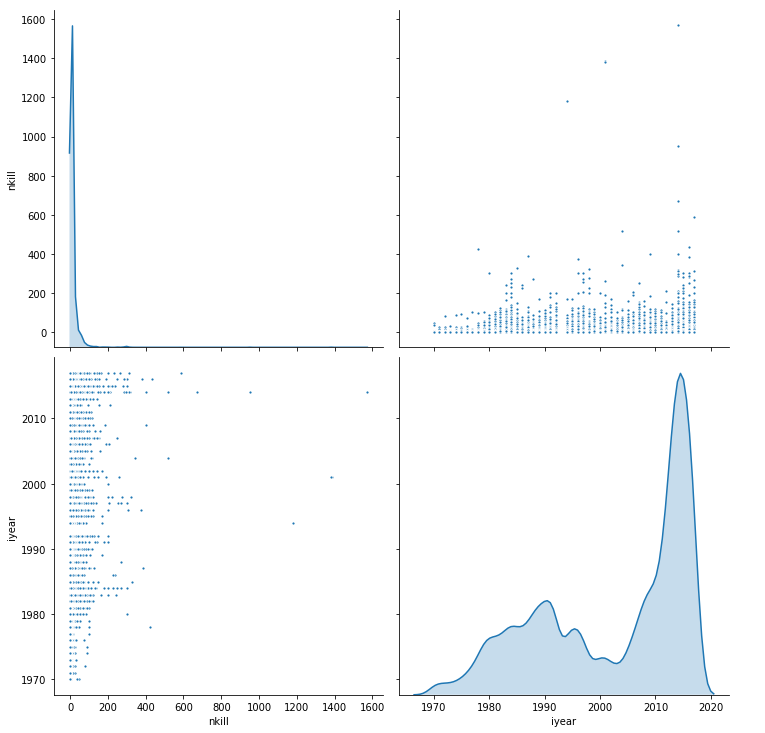

In [76]:
SeaBorn.pairplot(data=dataset_gtd[['nkill','iyear']],height=5,markers='.',diag_kind='kde')

Y ahora lo dividimos en la variable categórica de las regiones.

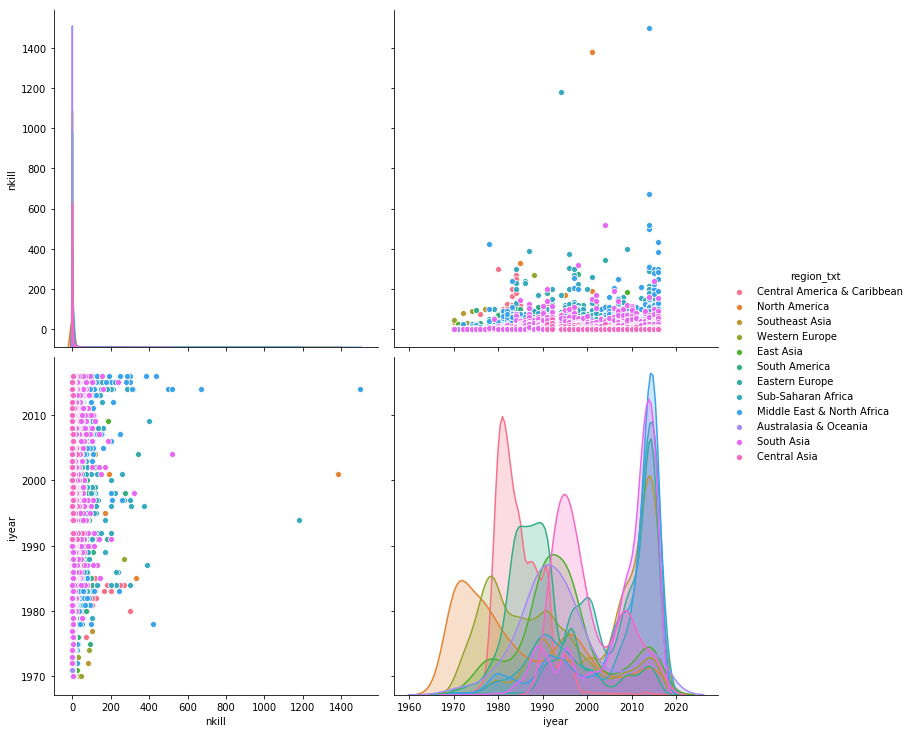

In [54]:
SeaBorn.pairplot(data=Dataset[['nkill','iyear','region_txt']],hue='region_txt',height=5)

Podemos presentar la información de las regiones y sus sucesos terroristas por mes en un mapa de calor.

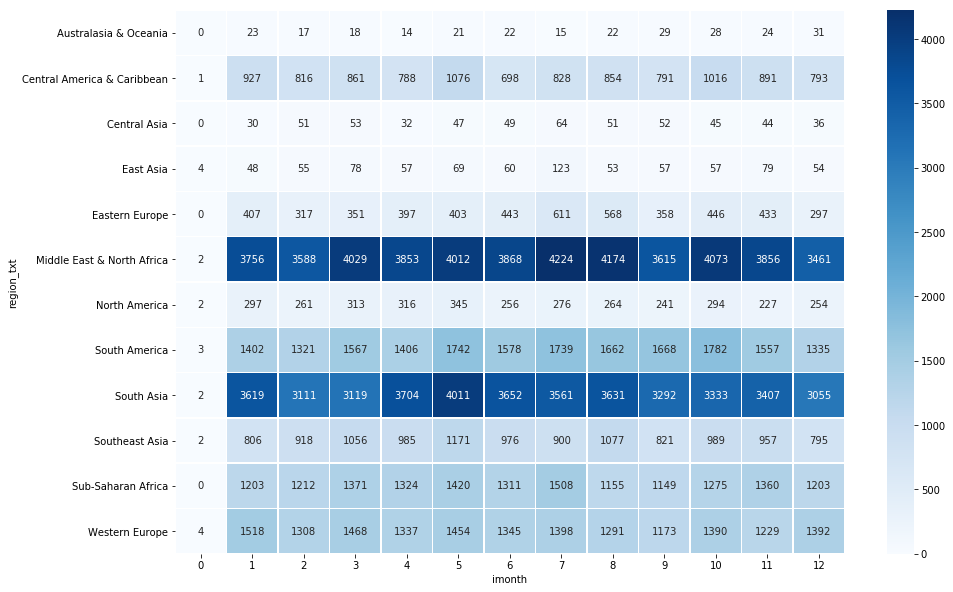

In [64]:
contingencia_tipoEstado = pd.crosstab(dataset_gtd['region_txt'],Dataset['imonth'])
PyPlot.figure(figsize=(15,10))
SeaBorn.heatmap(contingencia_tipoEstado,xticklabels=contingencia_tipoEstado.columns,yticklabels=contingencia_tipoEstado.index,cmap="Blues",annot=True,fmt='d',linewidths=0.5)

Resumimos nuestra información por región en una tabla pivote.

In [118]:
estadoPivot = pd.pivot_table(dataset_gtd,values=['iyear','imonth','iday','nkill'],index='region_txt')
estadoPivot

,iday,imonth,iyear,nkill
region_txt,,,,
Australasia & Oceania,15.301418,7.095745,1995.205674,0.543478
Central America & Caribbean,14.918600,6.488012,1984.909126,3.578659
Central Asia,15.527531,6.539964,2000.289520,1.788909
East Asia,16.299252,6.567332,1994.815461,1.509830
Eastern Europe,15.634914,6.595062,2007.000583,1.489554
Middle East & North Africa,15.666323,6.459563,2008.260352,2.855584
North America,15.329572,6.251447,1986.029225,1.461790
South America,15.479239,6.605543,1990.361577,1.666994
South Asia,15.573932,6.445124,2008.633499,2.300770


Podemos representarlo por medio de calor, pero en este caso no resulta de mucha utilidad.

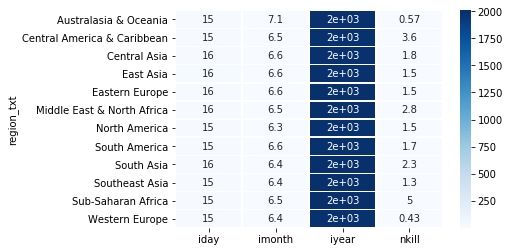

In [67]:
heatMapEstado=SeaBorn.heatmap(estadoPivot,xticklabels=estadoPivot.columns,yticklabels=estadoPivot.index,cmap="Blues",annot=True,linewidths=0.5)

Podemos graficar una proyección en un pair plot, con una tabla pivote con respecto a cada país de la base.

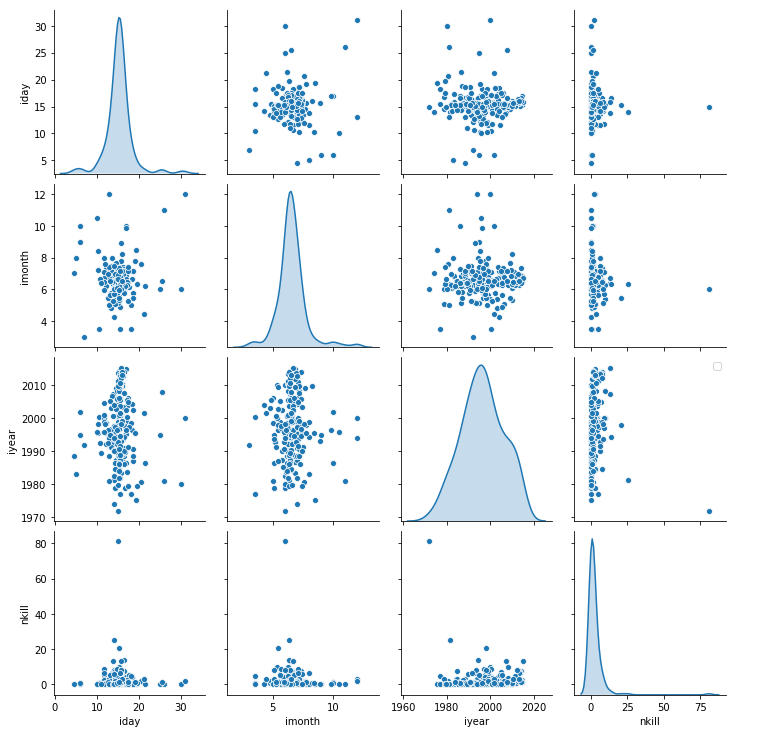

In [116]:
region_pi = pd.pivot_table(dataset_gtd,values=['iyear','imonth','iday','nkill'],index='country_txt')
SeaBorn.pairplot(region_pi,diag_kind='kde')
PyPlot.legend(region_pi.index)

A partir de la tabla pivote, tanto en regiones como ciudades, produciremos una clasificación jerárquica en clusters.

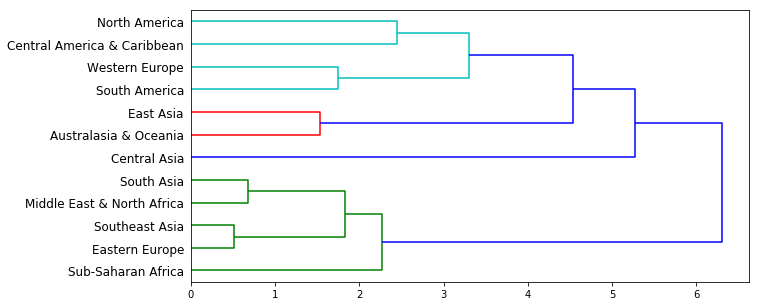

In [119]:
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.spatial import distance_matrix
#creamos una matriz de distancias para ver la distancia punto a punto

#retiramos todos los campos con NaN
estadoPivot_sinNaN = estadoPivot.dropna()
#la otra opción en vez de 'single' es 'ward'
conexionesCluster = linkage(estadoPivot_sinNaN,'single')

#creamos el dendrograma
PyPlot.figure(figsize=(10,5))
dendrogram(conexionesCluster,orientation='right',labels=estadoPivot_sinNaN.index,show_leaf_counts=True)
PyPlot.show()

Veamos como es el asunto en Sur América.

In [110]:
dataset_gtd_southam = dataset_gtd[dataset_gtd["region_txt"] == "South America"]
estadoPivot_countries = pd.pivot_table(dataset_gtd_southam,values=['nkill'],index='country_txt')

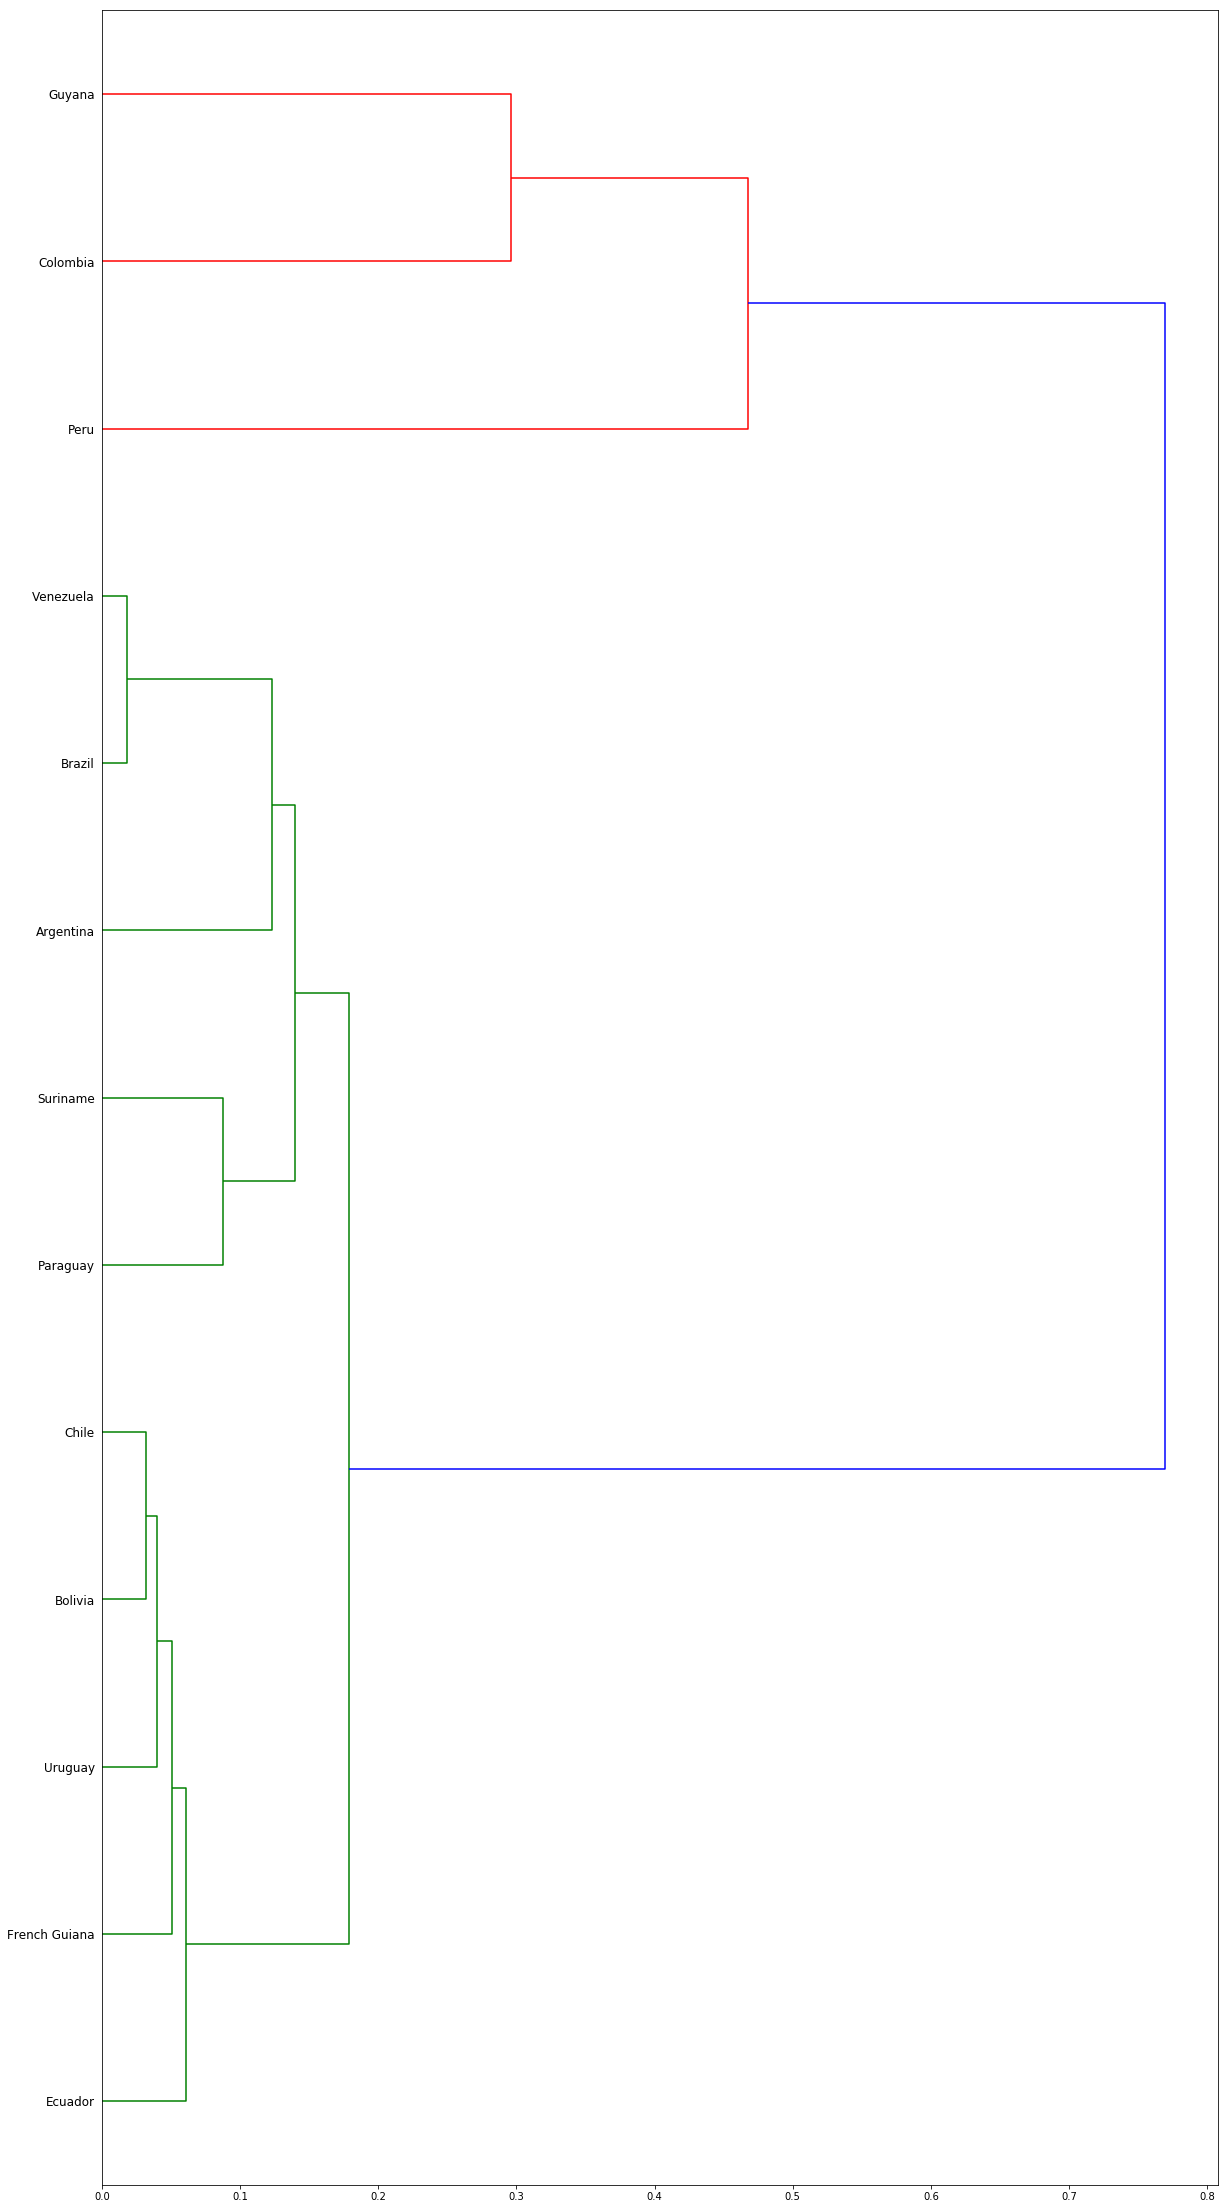

In [108]:
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.spatial import distance_matrix
#creamos una matriz de distancias para ver la distancia punto a punto

#retiramos todos los campos con NaN
estadoPivot_sinNaN = estadoPivot_countries.dropna()
#la otra opción en vez de 'single' es 'ward'
conexionesCluster = linkage(estadoPivot_sinNaN,'single')

#creamos el dendrograma
PyPlot.figure(figsize=(20,40))
dendrogram(conexionesCluster,orientation='right',labels=estadoPivot_sinNaN.index,show_leaf_counts=True)
PyPlot.show()